In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [ ]:
!apt update && apt install -y graphviz
!pip install graphviz

In [4]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py -O adspy_shared_utilities.py
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/CommViolPredUnnormalizedData.txt -O CommViolPredUnnormalizedData.txt

--2020-12-16 08:24:36--  http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py [following]
--2020-12-16 08:24:36--  https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9981 (9.7K) [text/x-python]
Saving to: ‘adspy_shared_utilities.py’

adspy_shared_utilit 100%[===================>]   9.75K  --.-KB/s    in 0s      

2020-12-16 08:24:36 (140 MB/s) - ‘adspy_shared_utilities.py’ saved [9981/9981]

--2020-12-16 08:24:36--  http://www.eyrignoux.com.fr/coursIA/machineLearning/CommViolPredUnnormal

#Regularization
As seen in chapter "1.4 - Machine Learning - Decision Trees - Overfitting", overfitting means that the algorithm learns very well the training set, but generalizes poorly to new data. This problem is recurring with powerful algorithms like neural networks, and we have to be able to detect and avoid it.

**"Regularization" is the name given to the techniques that limit overfitting.**

Normalization, which we addressed at chapter "1.3 - Machine Learning - Normalization" and at the end of chapter "1.5 - Machine Learning - Linear Regression", is a reguslarization technique.

Here, we are going to study 2 other techniques, which work with regression and logistic regression (which we will detail later), based on "constraining" the coefficients $\Theta_i$ seen in the previous chapter.

**Neural networks have other specific techniques, that we will learn in chapter "2.4 - Deep Learning - DNN - Regularization - Hyperparameters choice", but the 2 techniques below can be applied to neural networks.** (and indeed, they are very effective for neural networks)

##Regularization L1 - aka Lasso Regression

If each point has N features, the regression curve has an equation in a N+1 -dimensional space:

$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x_1 + ... + \Theta_n \cdot x_n$

Regularization L1 adds a term to the cost function (refer to chapter "1.5 - Machine Learning - Linear regression"):

$J(\Theta_0, ..., \Theta_n)=\frac{1}{2m}\cdot\sum\limits_{i=1}^m(h_\Theta(x_i) - y_i)^2 \color{blue}{+ \frac{\alpha}{m} \cdot \sum\limits_{j=1}^n|\Theta_j|}$

The bigger $\alpha$, the more the coefficients $\Theta_i$ corresponding to unsignificant features will progressively tend to 0. It allows to select important features, and eliminate the other ones, which makes the model easier to interpret. Be careful, if $\alpha$ is too big, the coefficient all tend to 0:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/RegularizationL1.PNG)

Here, each point has 6 features $\Theta_1, ..., \Theta_6$, each represented by a colored curve. When $\alpha = 10^{-1}$, regularization has a small effect, and the features are all different from 0. When  $\alpha = 1.1$, 3 of them are equal to 0, which means that they are less significant than the other 3 ones. Notice that these values are obtained at the end of the gradient descent. The Python examples below need 10.000 iterations (maxiter=10000 - ie. 10000 steps of gradient descent) before removing the unsignificant coefficients $\Theta_i$ .


###Mathematical explanation
Because our goal is to minimize the overall objective function, the regularization term acts as a penalty of models with lots of large feature weight values. 

In other words, all things being equal, if the regression finds two possible linear models that predict the training data values equally well, it will prefer the linear model that has a smaller overall sum of feature weights.

The practical effect of using regularization, is to find the feature weights $\Theta_i$ that fit the data well in at least square sense, and that set lots of the feature weights to values that are very small. We don't see this effect with a single variable linear regression example, but for regression problems with dozens or hundreds of features, the accuracy improvement from using regularized linear regression could be significant.

The amount of regularisation to apply is controlled by the alpha parameter. Larger alpha means more regularization and simpler linear models with weights closer to zero. The default setting for alpha is 1.0. Notice that setting alpha to zero corresponds to the special case of ordinary least-squares linear regression that we saw earlier, that minimizes the total square here.

###Example - Crime dataset

In [5]:

from adspy_shared_utilities import load_crime_dataset

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

AttributeError: ignored

In this example, regularization L1 is called "Lasso()". It means "LinearRegression()", as in chapter 1.5, plus the L1 regularization term.

We also use normalization with MinMaxScaler.

At the end of the regression, 20 coefficients are different from 0. The other ones correspond to unsignificant features.

I've listed the features with non-zero weights in order of their descending magnitude from the output. Although we need to be careful in interpreting any results for data on a complex problem like crime, **the lasso regression results do help us see some of the strongest relationships between the input variables and outcomes for this particular data set**. For example, looking at the top five features with non-zero weight that are found by lasso regression, we can see that location factors like percentage of people in dense housing, which indicates urban areas and socio economic variables like the fraction of vacant houses in an area are positively correlated with crime. And other variables like the percentage of families with two parents is negatively correlated. 

Finally, we can see the effect of tuning the regularisation parameter alpha for lasso regression. There's an optimal range for alpha that gives the best test set performance that neither under or over fits. Of course this best alpha value will be different for different data sets, and depends on various other factors such as the feature preprocessing methods being used.

In [ ]:

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985809
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

###Impact of regularization on overfitting
As seen in chapter "1.5 - Machine Learning - Linear Regression", we can use the $R^2$ indicator in order to evaluate the gain of the regression, compared to the raw mean of the values of the dataset.

Moreover, as seen in chapter "1.4 - Machine Learning - Decision Trees - Overfitting", the term "overfitting" means that the algorithm learnt very well the results of the training set, but generalizes poorly to other data. Regularization aims at fighting overfitting.

In order to measure the impact of regularization, we can compute $R^2$ for each value of $\alpha$, on the training set and on the test set. Please recall that:
- a bad result on both sets indicates underfitting
- a good result on both sets indicates good generalization: it is our objective
- a good result on the training set, and a bad result on the test set indicates overfitting

A good $R^2$ is near 1. If we study the value of $R^2$ according to $\alpha$, we get this:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/RegularizationL1-2.PNG)

With this dataset, the best value of $\alpha$ is around $10^{0.8}$, ie. around 6,3. Under, we are clearly overfitting, and above, it is starting to underfit.
Please notice, in the preceding diagram, that this value of $\alpha$ corresponds to a state where 3 coefficients $\Theta_i$ tend to 0, and the 3 other ones are starting to decrease.



##Regularization L2 - aka Rigde Regression

Regularization L2 is almost the same as regularization L1, except that we add the square of the coefficients $\Theta_i$, instead of their absolute value.
In the same idea, there is also a regularization (power 3), L4 (power 4), etc...

In practice, only L1 and L2 are used, because they produce good results, without complexifying too much the calculus.

$J(\Theta_0, ..., \Theta_n)=\frac{1}{2m}\cdot\sum\limits_{i=1}^m(h_\Theta(x_i) - y_i)^2 \color{blue}{+ \frac{\alpha}{2m} \cdot \sum\limits_{j=1}^n\Theta_j^2}$

The result of regularization L2 is different from regularization L1: here, the coefficients $\Theta_i$ are all constrained at the same time, and none is set to 0.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/RegularizationL2.PNG)

The impact on overfitting is softer:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/RegularizationL2-2.PNG)

Here, the best $\alpha$ lies between $10^{0.2}$ and $10^{0.3}$. Before, there is overfitting, and after, underfitting.


###Ridge regression without normalization
The results are not that impressive. The R-squared score on the test set is pretty comparable to what we got without regularization. 


In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846132
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476

###Ridge regression with normalization


As we saw previously, regularization imposes a penalty on the $\Theta_i$ coefficients, so the effect of increasing alpha is to shrink them toward zero and towards each other. But if the input variables, the features, have very different scales, then when this shrinkage happens of the coefficients, input variables with different scales will have different contributions to this L2 penalty, because the L2 penalty is a sum of squares of all the coefficients. So transforming the input features, so they're all on the same scale, means the ridge penalty is in some sense applied more fairly to all features without unduly weighting some more than others, just because of the difference in scales. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044161
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

###Ridge regression with alpha optimization
On this dataset, the best R-squared value on the test set is achieved with an alpha setting of around 20.

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



/usr/local/lib/python3.6/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7033944506028014e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


#Polynomial regression
In many cases, we need a curve, more than a line, in order to pass as near as possible to the points.

For example, the price of a house is not linear with respect to its surface: it looks more like a square root, or a logarithm. Small flats will get a higher price per square meter than big ones.

It is the same for salaries according to seniority.

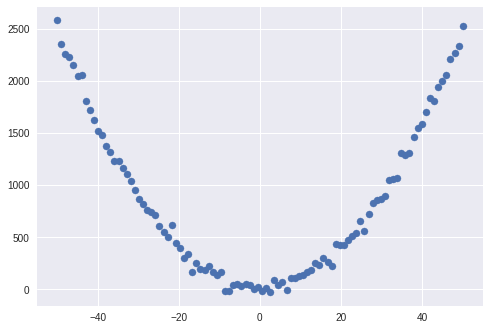

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X_R1 = np.linspace(-50, 50, 100)
y_R1 = np.power(X_R1,2)
noise = np.random.normal(0, 50, y_R1.shape)
y_R1 = y_R1 + noise
X_R1 = X_R1.reshape((100,1))

plt.figure()
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

Let's imagine that the points of our dataset are shaped like $y = x^2$ as above. The regression line tries to pass as near as possible to all the points, but does poorly, because of the shape of the curve. In this example, the regression line is similar to the mean of the points.

Thus, the coefficient $R^2$ is equal to 0, because the regression line is not better than the average of the points.

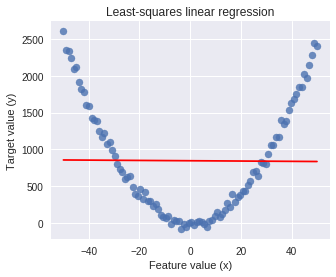

R-squared score (training): 0.000


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(tmp, y_R1)

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

print('R-squared score (training): {:.3f}'
     .format(linreg.score(tmp, y_R1)))

If we try a polynom of degree n as the regression curve, instead of our regression line, its equation becomes:

$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x + \Theta_2 \cdot x^2 + ... + \Theta_n \cdot x^n$, and the algorithm has to find the best possible coefficients $\Theta_0, \Theta_1, ..., \Theta_n$.

The class PolynomialFeatures() allows to generate the coefficients $x, x^2, ..., x^n$ according to the degree n of the polynom that we chose to look for. We simply have to feed them into a classic regression, in order to determine their coefficients $\Theta_i$

**In fact, polynomial regression is a particular case, because we can try any equation: we can use sinus, cosinus, roots of degree N...** On the point of view of the algorithm, it is still a classical regression: each new coefficient corresponds to a new feature of the points.

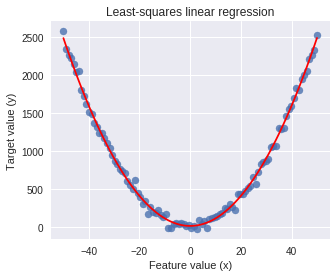

R-squared score (training): 0.996


In [ ]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_R1_poly = poly.fit_transform(X_R1)

linreg = LinearRegression().fit(X_R1_poly, y_R1)

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_[2] * np.power(X_R1,2) + linreg.coef_[1] * np.power(X_R1,1) + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_R1_poly, y_R1)))

##Polynomial regression with regularization
In practice, data has more than 2 features. It is impossible to represent the dataset in a 2D or 3D space, which makes difficult to predict the shape of the curve.

Therefore, we might be tempted to try the most complex possible curve that we can imagine, and hope that unsignificant coefficients will shrink to 0, for example by using L1 regularization.

**In doing so, instead of finding the best curve, we will get a super-overfitting curve, which will pass through all the points of the training set.** 

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/polynomialreg2.png)


In the code below, we want to evaluate the need for regularization when using polynomial regression.
We made up a random dataset with the function make_friedman1(), which has the following equation:

$y(x_0, ..., x_4) = 10 * sin(pi * x_0 * x_1) + 20 * (x_2 - 0.5)^2 + 10 * x_3 + 5 * x_4 + noise * N(0, 1)$

This equation is not polynomial, but we will see below that polynomial regression is able to get a good approximation with a polynom of degree 2.

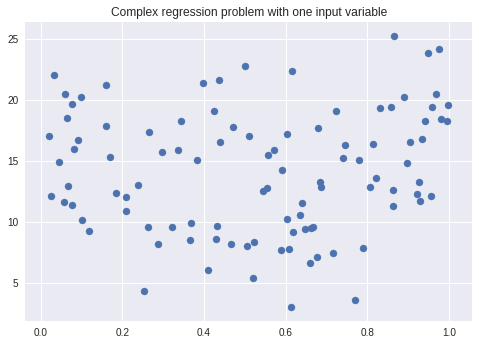

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared 

In [ ]:

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

##In practice: problem with increasing the complexity of the curve
It is tempting to imagine extremely complex curves, in hope that they would fit the data better than less complex curves. For example, if the data has 3 features (which is very few), the regression line has a simple equation:

$h_\Theta(x) = \Theta_0 + \Theta_1 * x_1 + \Theta_2 * x_2 + \Theta_3 * x_3$ : cette équation est simple

But if we want to look for a curve, we can add polynoms, sinus, coupling features, and so on... and the equation of the curve becomes exponentially complex:

$h_\Theta(x) = \Theta_0 + \Theta_1 * x_1 + \Theta_2 * x_2 + \Theta_3 * x_3 + \Theta_4 * x_1^2 + \Theta_5 * cos(x_1) + \Theta_6 * x_1 * x_2 + ...$

We get very fast an equation with millions of coefficients $\Theta_i$, too heavy to be computed. We will see in the Deep Learning course that neural networks tackle that problem.